In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Array Conditional Statements and `numpy.where()`

## Comparison and Bitwise Operations on Arrays

We can apply comparison operators to arrays:

In [2]:
a1 = np.array([1,  2, 3, 4, 5])

a2 = np.array([2, 1, 5, 6, 4])

a1 < a2

array([ True, False,  True,  True, False])

As you can see this gives us an array of booleans, each element representing the outcome of comparing the corresponding element of `a1` to `a2`. 

What if we wanted to combine the boolean arrays with a logical operator? For example, if we want an array of booleans for the condition `a1` is less-than `a2` and greater than `2`. Unfortunately the boolean comparison operators we used in [**Standard Library/If Statements/Comparison Operators**](../../standard-library/if-statements/comparison-operators) won't work. For example using `and`:

In [3]:
a1 < a2 and a1 > 2

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In order to combine boolean arrays (without a loop) we need to use **bitwise** operators.

Bitwise operators treat numbers as a string of bits and act on them bit by bit. In the case of a boolean array, the operator acts on it element by element. The bitwise operators we are interested are:

<table>
    <tr>
        <th>Operator</th>
        <th>Name</th>
        <th>Analogous boolean operator</th>
    </tr>
    <tr>
        <td><code>&</code></td>
        <td>Bitwise and</td>
        <td><code>and</code></td>
    </tr>
    <tr>
        <td><code>|</code></td>
        <td>Bitwise or</td>
        <td><code>or</code></td>
    </tr>
    <tr>
        <td><code>~</code></td>
        <td>Bitwise complement</td>
        <td><code>not</code></td>
    </tr>
</table>

(See <https://wiki.python.org/moin/BitwiseOperators> for a more comprehensive list and explanation of bitwise operations.)

Returning to our original example:

In [4]:
(a1 < a2) & (a1 > 2)

array([False, False,  True,  True, False])

Note that the comparisons must be grouped in brackets for this to work:

In [5]:
a1 < a2 & a1 > 2

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b> - Random Points in a Region</h5>

We can use `np.where()` to check which points in an array lie inside or outside of region.

First let's generate an array of 50 random points in 2D space:

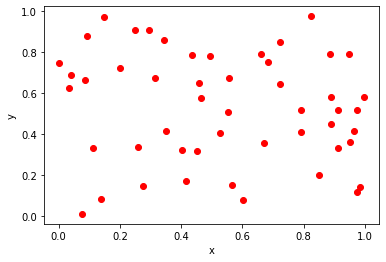

In [6]:
points = np.random.random((2, 50))

plt.plot(points[0, :], points[1, :], 'ro')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Note that axis 0 of `points` is used to represent the x and y values, and axis 1 represents points. i.e. for the points $(x_0, y_0), (x_1, y_1), \dots, (x_{49}, y_{49})$, `points` is:

<table>
    <tr>
        <td>x0</td>
        <td>x1</td>
        <td>x2</td>
        <td>x3</td>
        <td>x4</td>
        <td>...</td>
        <td>x48</td>
        <td>x49</td>
    </tr>
    <tr>
        <td>y0</td>
        <td>y1</td>
        <td>y2</td>
        <td>y3</td>
        <td>y4</td>
        <td>...</td>
        <td>y48</td>
        <td>y49</td>
    </tr>
</table>


Now, let's plot the points which lie to the left of 0.5 as blue and the others as red:

Text(0, 0.5, 'y')

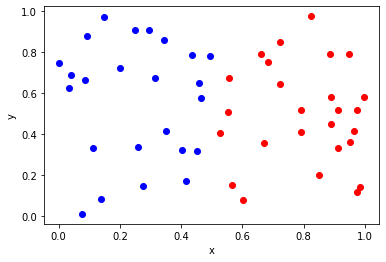

In [7]:
is_left = points[0, :] < 0.5 #True where left of 0.5

plt.plot(points[0, is_left], points[1, is_left], 'bo')
plt.plot(points[0, ~ (is_left)], points[1, ~ is_left], 'ro')

plt.xlabel('x')
plt.ylabel('y')

Note that, in the example above, we have used an array of booleans to **slice the elements of the array which are true**. We have also use the **bitwise compliment** to get the complement of our comparison result, there is no need to recalculate it.

Now, lets plot the points right of 0.5 and above 0.5 (the top left square) as red and the rest as blue (remember the **bitwise and**):

Text(0, 0.5, 'y')

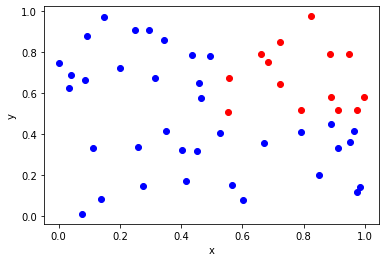

In [8]:
#True if in top left square
is_top_left = (points[0, :] > 0.5) & (points[1, :] > 0.5)

plt.plot(points[0, is_top_left], points[1, is_top_left], 'ro')
plt.plot(points[0, ~ (is_top_left)], points[1, ~ is_top_left], 'bo')

plt.xlabel('x')
plt.ylabel('y')

</div>

## `numpy.where()`

[Documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html)

```python
numpy.where(condition[,x, y])
```

Returns elements chosen from `x` or `y` depending on the condition. If no `x` or `y` arguments are provided it returns and array of indices.

In [9]:
arr = np.arange(10, 20)

arr_where = np.where(arr > 15) 

print('arr1:', arr)
print('Indices where arr1 is greater than 15:', arr_where)
print('The sub-array of arr1 that is greater than 15:', arr[arr_where])

arr1: [10 11 12 13 14 15 16 17 18 19]
Indices where arr1 is greater than 15: (array([6, 7, 8, 9]),)
The sub-array of arr1 that is greater than 15: [16 17 18 19]


If both `x` and `y` is specified, the elements of the returned array come from `x` if `condition` is true, or from `y` if `condition` is false.

In [10]:
x = np.linspace(1, 5, 5)
#y = np.linspace(-5, -1, 5)
y = -x

condition = [True, False, True, True, False] 

print('x:', x)
print('y:', y)
print('Condition:', condition)
print('x where True, y where False:', np.where(condition, x, y))

x: [1. 2. 3. 4. 5.]
y: [-1. -2. -3. -4. -5.]
Condition: [True, False, True, True, False]
x where True, y where False: [ 1. -2.  3.  4. -5.]


<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b> - Piecewise Defined Functions</h5>

One use for `np.where()` is to define a piecewise defined function that works on arrays.

As a first example, let's use `np.where()` to plot the absolute value function (you should really use `np.abs()` for this):

$$
y =
\begin{cases}
-x & \text{if $x < 0$}\\
x & \text{if $x \geq 0$}\\
\end{cases}
$$

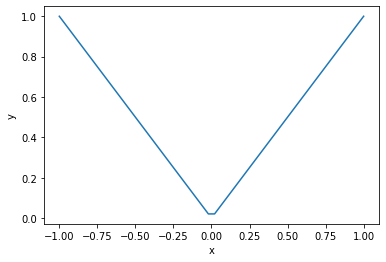

In [11]:
x = np.linspace(-1, 1)

y = np.where(x >= 0, x, -x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Note that, in the plot above, the line does not reach zero, but flattens out to a value above it. This is because the array `x` does not contain the value 0, but values around it.

Now, consider the piecewise function:

$$
f(x) =
\begin{cases}
-(x + 1)^2 + 1 & \text{if $x < -1$}\\
- x & \text{if $-1 \leq x \geq 1$}\\
(x - 1)^3 - 1 & \text{if $x > 1$}
\end{cases}
$$

where there are three regions. To handle this we can use 2 `np.where()` calls:

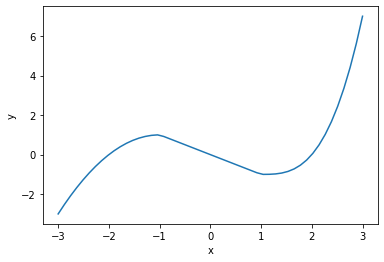

In [12]:
x = np.linspace(-3, 3)

#Left condition
y = np.where(x < -1, -(x+1)**2 + 1, -x)

#Right condition
y = np.where(x > 1, (x - 1)**3 - 1, y)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

</div>

</div>